# nunIntroduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 1.3 MB/s eta 0:00:12
    --------------------------------------- 0.3/15.6 MB 3.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/15.6 MB 4.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/15.6 MB 5.4 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/15.6 MB 9.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.6 MB 9.1 MB/s eta 0:00:02
   ------- -------------------------------- 3.1/15.6 MB 9.3 MB/s eta 0:00:02
   ------------ --------------------------- 4.9/15.6 MB 12.5 MB/s eta 0:00:01
   -------------- ------------------------- 5.6/15.6 MB 12.3 MB/s eta 0:00:01
   ---------------- ----------------------- 6.6/15.6 MB 13.1 MB/s eta 0:00:01
   ------------------ --------------------- 7.2/15.6 MB 13.2 MB/s eta 0:00:01
   -------------------- ------------------- 7.9/15.6 MB 13.2 MB/s eta 0:00:01
 

## Import Statements

In [10]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install collections

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     -------------------- ------------------ 81.9/158.4 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 158.4/158.4 kB 2.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB 6.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.5 MB 10.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.5 MB 12.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.1/7.5 MB 11.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.5 MB 14.0 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.5 

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f'The shape of Fatalities is: {df_fatalities.shape}')
print(f'The shape of Income is: {df_hh_income.shape}')
print(f'The shape of Poverty is: {df_pct_poverty.shape}')
print(f'The shape of Completed High School is: {df_pct_completed_hs.shape}')
print(f'The shape of Race is: {df_share_race_city.shape}')

The shape of Fatalities is: (2535, 14)
The shape of Income is: (29322, 3)
The shape of Poverty is: (29329, 3)
The shape of Completed High School is: (29329, 3)
The shape of Race is: (29268, 7)


In [5]:
print(f'The columns of Fatalities is: {df_fatalities.columns}')
print(f'The columns of Income is: {df_hh_income.columns}')
print(f'The columns of Poverty is: {df_pct_poverty.columns}')
print(f'The columns of Completed High School is: {df_pct_completed_hs.columns}')
print(f'The columns of Race is: {df_share_race_city.columns}')

The columns of Fatalities is: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
The columns of Income is: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
The columns of Poverty is: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
The columns of Completed High School is: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
The columns of Race is: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [6]:
print(f'Any duplicate in Fatalities: {df_fatalities.duplicated().values.any()}')
print(f'Any duplicate in Income: {df_hh_income.duplicated().values.any()}')
print(f'Any duplicate in Poverty: {df_pct_poverty.duplicated().values.any()}')
print(f'Any duplicate in Completed High School: {df_pct_completed_hs.duplicated().values.any()}')
print(f'Any duplicate in Race: {df_share_race_city.duplicated().values.any()}')

Any duplicate in Fatalities: False
Any duplicate in Income: False
Any duplicate in Poverty: False
Any duplicate in Completed High School: False
Any duplicate in Race: False


In [7]:
print(f'Any NaN values among Fatalities? {df_fatalities.isna().values.any()}')
print(f'Any NaN values among Income? {df_hh_income.isna().values.any()}')
print(f'Any NaN values among Poverty? {df_pct_poverty.isna().values.any()}')
print(f'Any NaN values among Completed High School? {df_pct_completed_hs.isna().values.any()}')
print(f'Any NaN values among Race? {df_share_race_city.isna().values.any()}')

Any NaN values among Fatalities? True
Any NaN values among Income? True
Any NaN values among Poverty? False
Any NaN values among Completed High School? False
Any NaN values among Race? False


In [23]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [24]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [25]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [26]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [27]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [18]:
df_fatalities.fillna(0, inplace=True)
df_hh_income.fillna(0, inplace=True)

In [19]:
print(f'Any NaN values among Fatalities? {df_fatalities.isna().values.any()}')
print(f'Any NaN values among Income? {df_hh_income.isna().values.any()}')

Any NaN values among Fatalities? False
Any NaN values among Income? False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [42]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

In [52]:
# Convert 'Geographic Area' to state initials and create a new DataFrame with the average poverty rate for each state
df_pct_poverty['State'] = df_pct_poverty['Geographic Area']
df_pct_poverty['State'] = df_pct_poverty['State'].apply(lambda x: x.strip())  # Remove any leading or trailing whitespaces
df_grouped_poverty = df_pct_poverty.groupby('State')['poverty_rate'].mean().reset_index()

# # Sort the new DataFrame by poverty_rate in descending order
df_sorted_poverty = df_grouped_poverty.sort_values(by='poverty_rate', ascending=False)

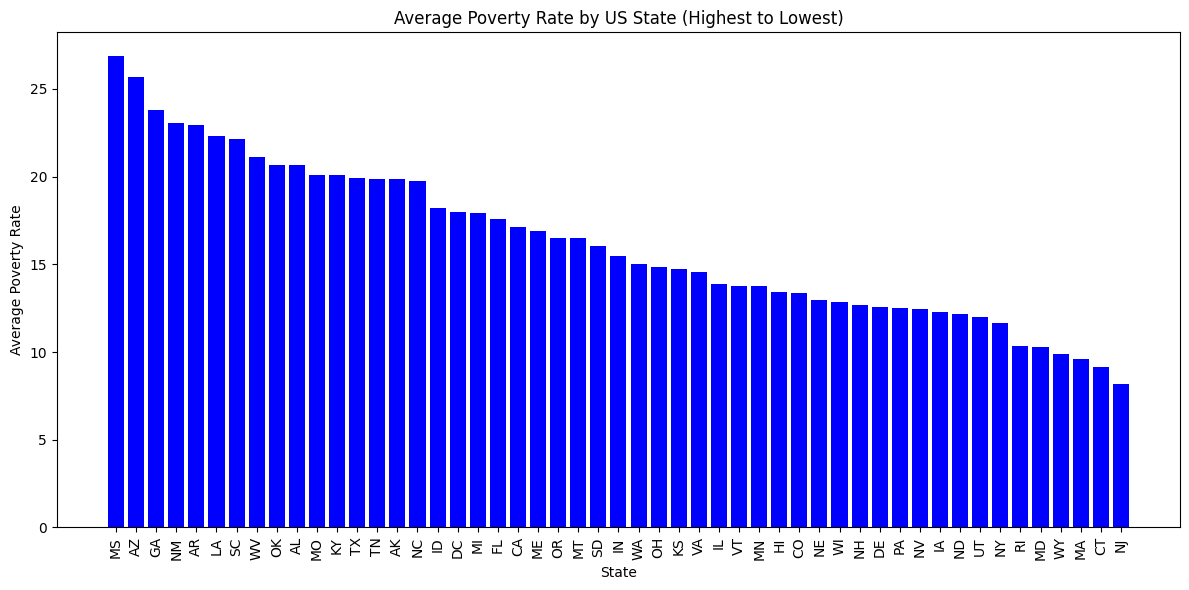

In [53]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_poverty['State'], df_sorted_poverty['poverty_rate'], color='blue')
plt.xlabel('State')
plt.ylabel('Average Poverty Rate')
plt.title('Average Poverty Rate by US State (Highest to Lowest)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [47]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

In [54]:
# Convert 'Geographic Area' to state initials and create a new DataFrame with the average poverty rate for each state
df_pct_completed_hs['State'] = df_pct_completed_hs['Geographic Area']
df_pct_completed_hs['State'] = df_pct_completed_hs['State'].apply(lambda x: x.strip())  # Remove any leading or trailing whitespaces
df_grouped_hs = df_pct_completed_hs.groupby('State')['percent_completed_hs'].mean().reset_index()

# # Sort the new DataFrame by percent_completed_hs in descending order
df_sorted_hs = df_grouped_hs.sort_values(by='percent_completed_hs', ascending=False)

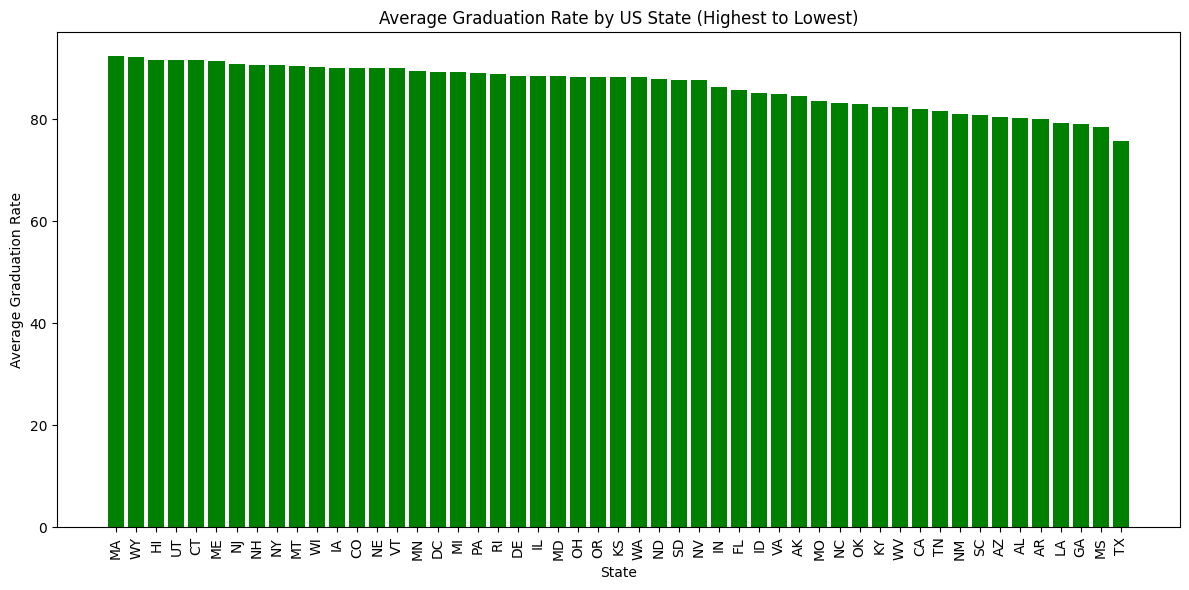

In [55]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sorted_hs['State'], df_sorted_hs['percent_completed_hs'], color='green')
plt.xlabel('State')
plt.ylabel('Average Graduation Rate')
plt.title('Average Graduation Rate by US State (Highest to Lowest)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [58]:
df_merged = pd.merge(df_sorted_hs, df_sorted_poverty, on='State')

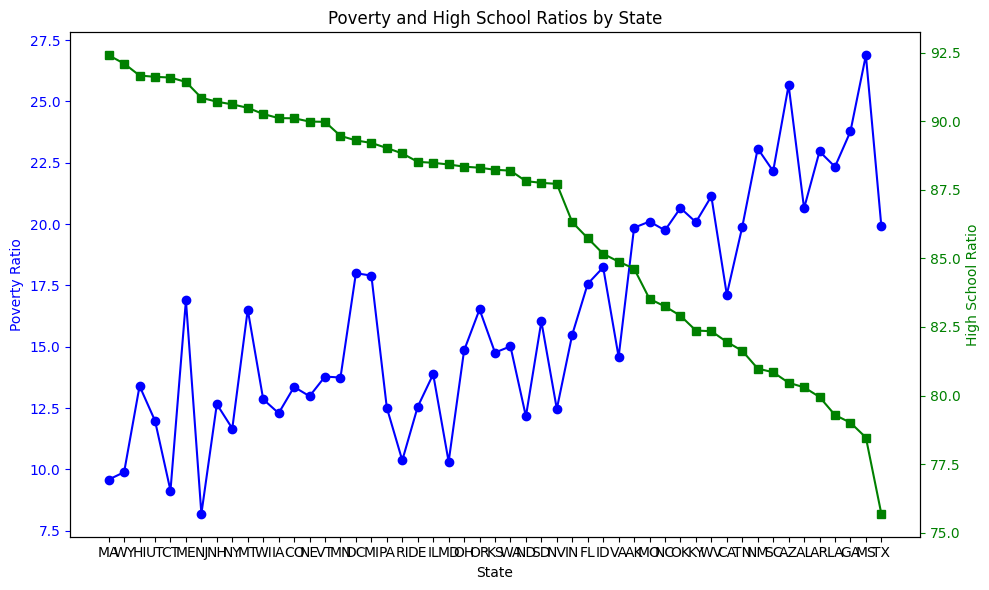

In [65]:
# Plot the line chart with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first y-axis (poverty ratio)
ax1.plot(df_merged['State'], df_merged['poverty_rate'], color='blue', marker='o', label='Poverty Ratio')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Ratio', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for the high school ratio
ax2 = ax1.twinx()
ax2.plot(df_merged['State'], df_merged['percent_completed_hs'], color='green', marker='s', label='High School Ratio')
ax2.set_ylabel('High School Ratio', color='green')
ax2.tick_params('y', colors='green')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90, ha='right') 

# Title and legend
plt.title('Poverty and High School Ratios by State')
fig.tight_layout()

# Show the plot
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

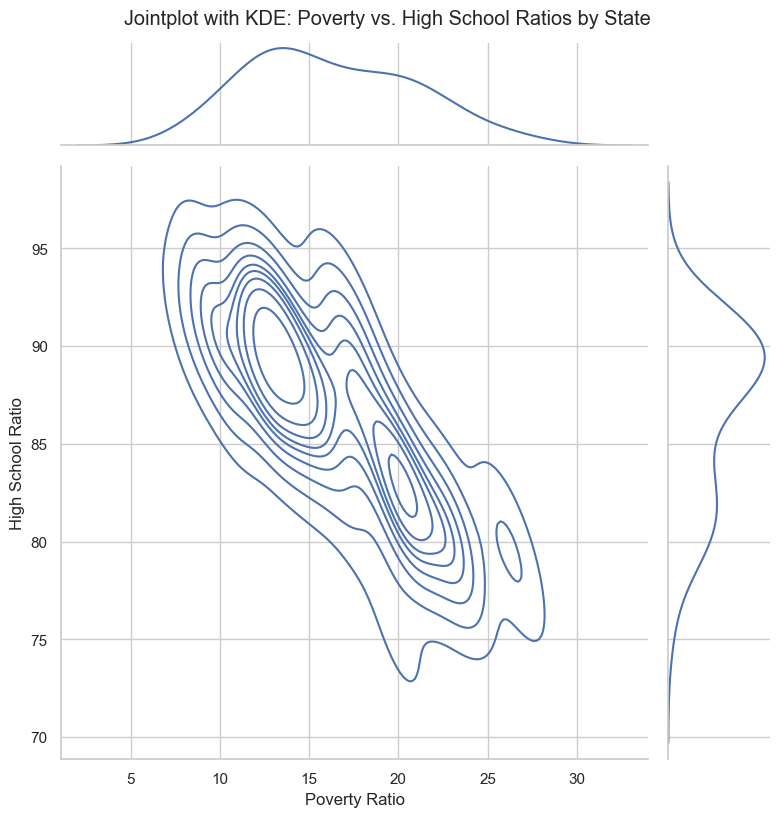

In [70]:
# Use Seaborn jointplot with KDE
sns.set(style="whitegrid")

# Jointplot with KDE
sns.jointplot(data=df_merged, x='poverty_rate', y='percent_completed_hs', kind='kde', height=8)

# Title and labels
plt.suptitle('Jointplot with KDE: Poverty vs. High School Ratios by State', y=1.02)
plt.xlabel('Poverty Ratio')
plt.ylabel('High School Ratio')

# Show the plot
plt.show()

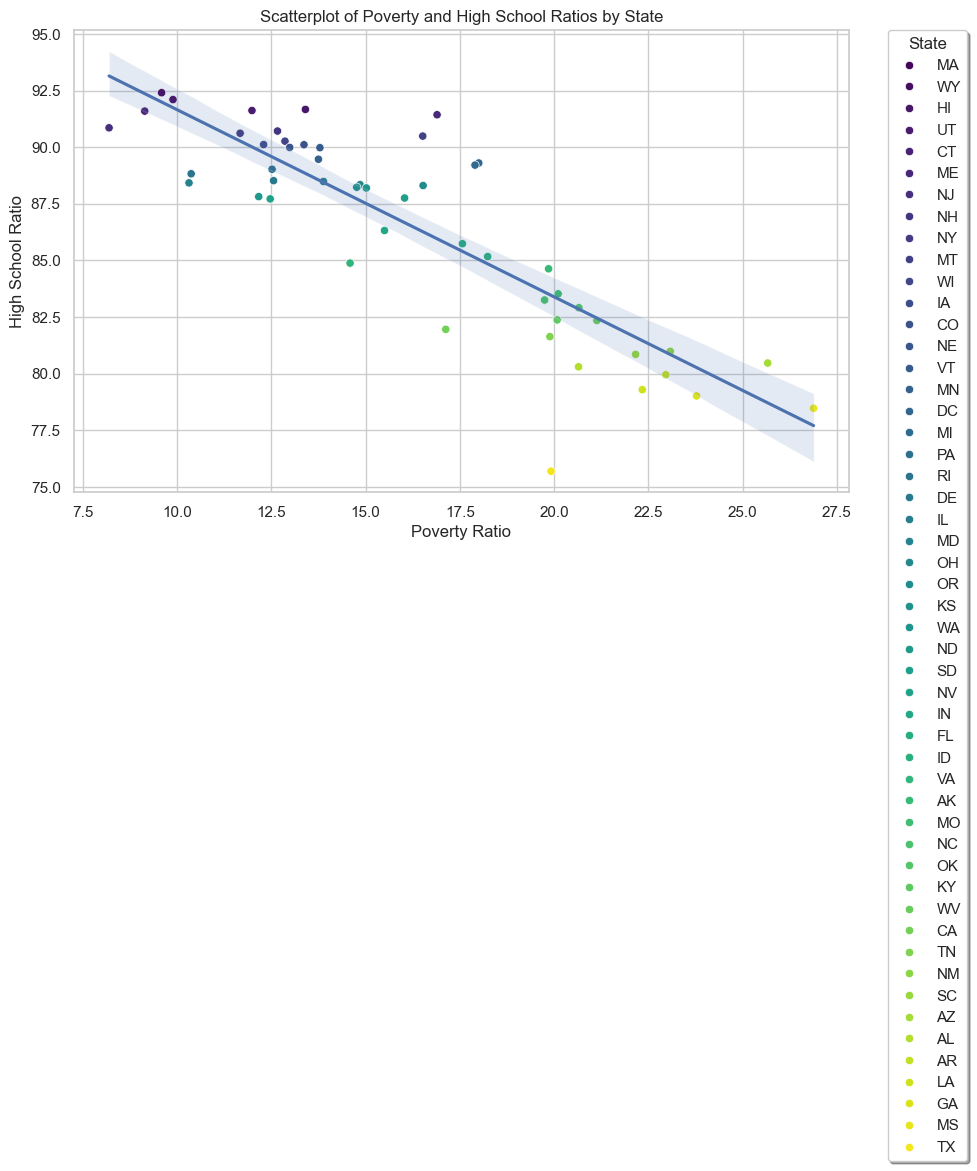

In [68]:
# Use Seaborn scatterplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = sns.scatterplot(data=df_merged, x='poverty_rate', y='percent_completed_hs', hue='State', palette='viridis')

# Add a regression line
sns.regplot(data=df_merged, x='poverty_rate', y='percent_completed_hs', scatter=False, ax=scatter)

# Title and labels
plt.title('Scatterplot of Poverty and High School Ratios by State')
plt.xlabel('Poverty Ratio')
plt.ylabel('High School Ratio')

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='State', shadow=True, fancybox=True)

# Show the plot
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

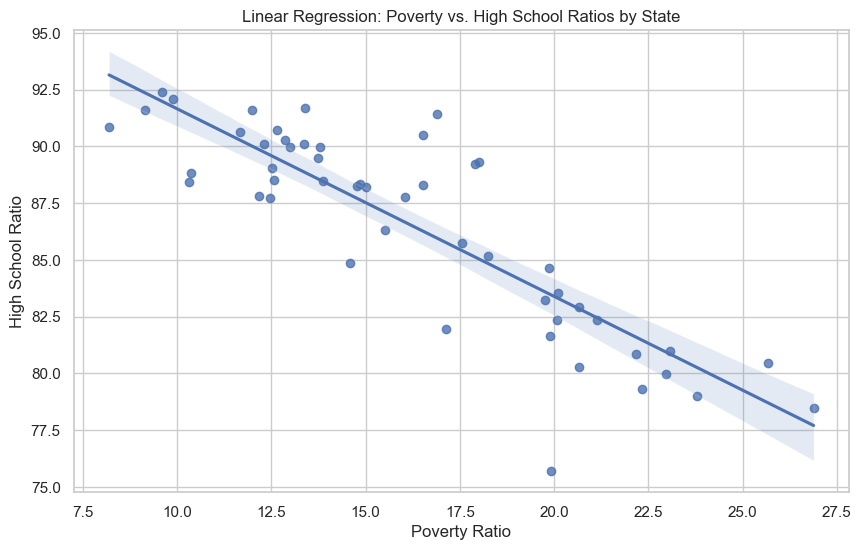

In [69]:
# Use Seaborn regplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Regression plot
sns.regplot(data=df_merged, x='poverty_rate', y='percent_completed_hs')

# Title and labels
plt.title('Linear Regression: Poverty vs. High School Ratios by State')
plt.xlabel('Poverty Ratio')
plt.ylabel('High School Ratio')

# Show the plot
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [73]:
# Convert racial makeup columns to numeric
racial_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[racial_columns] = df_share_race_city[racial_columns].apply(pd.to_numeric, errors='coerce')

# Group the DataFrame by 'Geographic area' and sum the racial makeup columns
df_grouped = df_share_race_city.groupby('Geographic area')[racial_columns].sum()

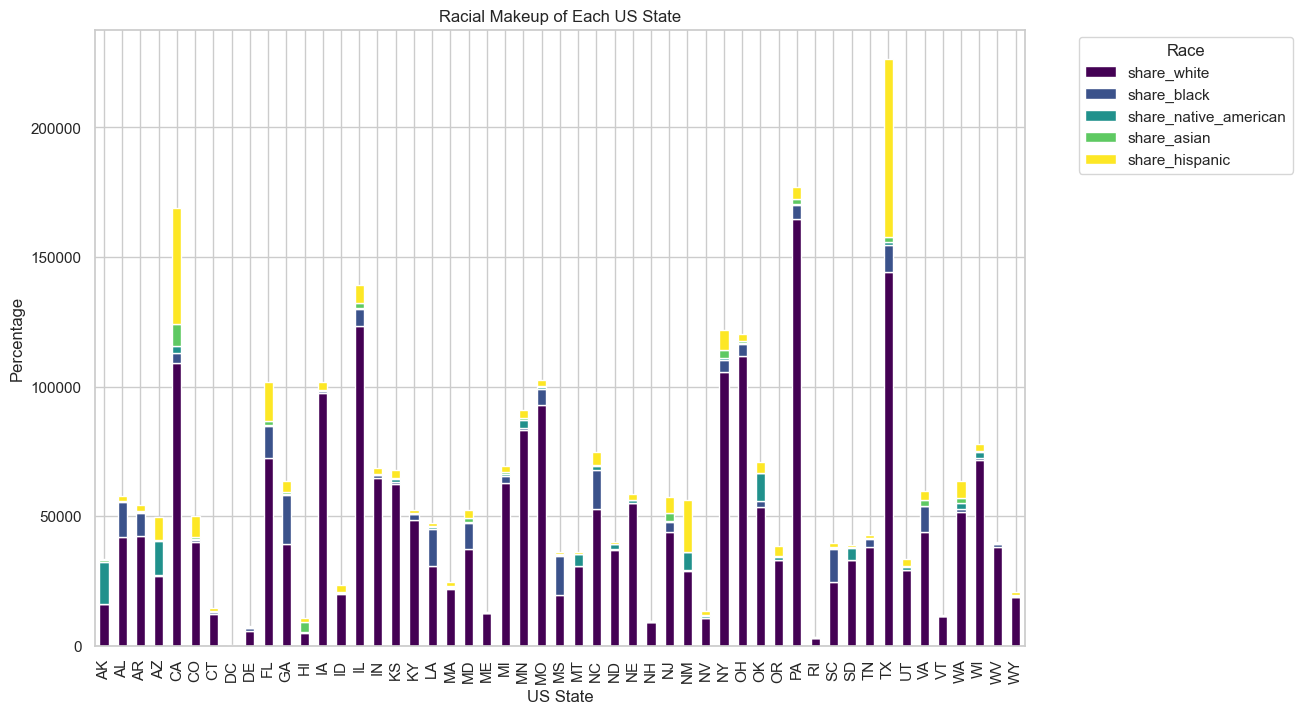

In [74]:
# Plot the bar chart with subsections
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Title and labels
plt.title('Racial Makeup of Each US State')
plt.xlabel('US State')
plt.ylabel('Percentage')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [82]:
df_race_grouped = df_fatalities.value_counts('race')
df_race_grouped.head()

race
W    1201
B     618
H     423
0     195
A      39
Name: count, dtype: int64

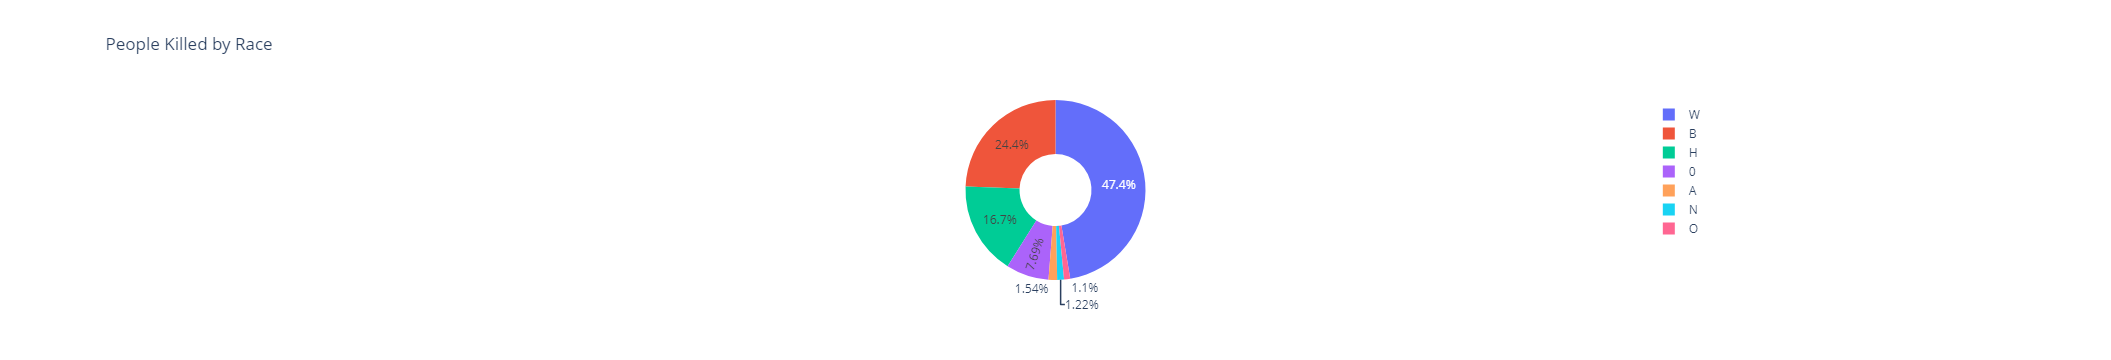

In [84]:
fig = px.pie(df_race_grouped, 
             names=df_race_grouped.index, 
             values='count', 
             title='People Killed by Race',
             hole=0.4,)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [85]:
df_gender_grouped = df_fatalities.value_counts('gender')
df_gender_grouped.head()

gender
M    2428
F     107
Name: count, dtype: int64

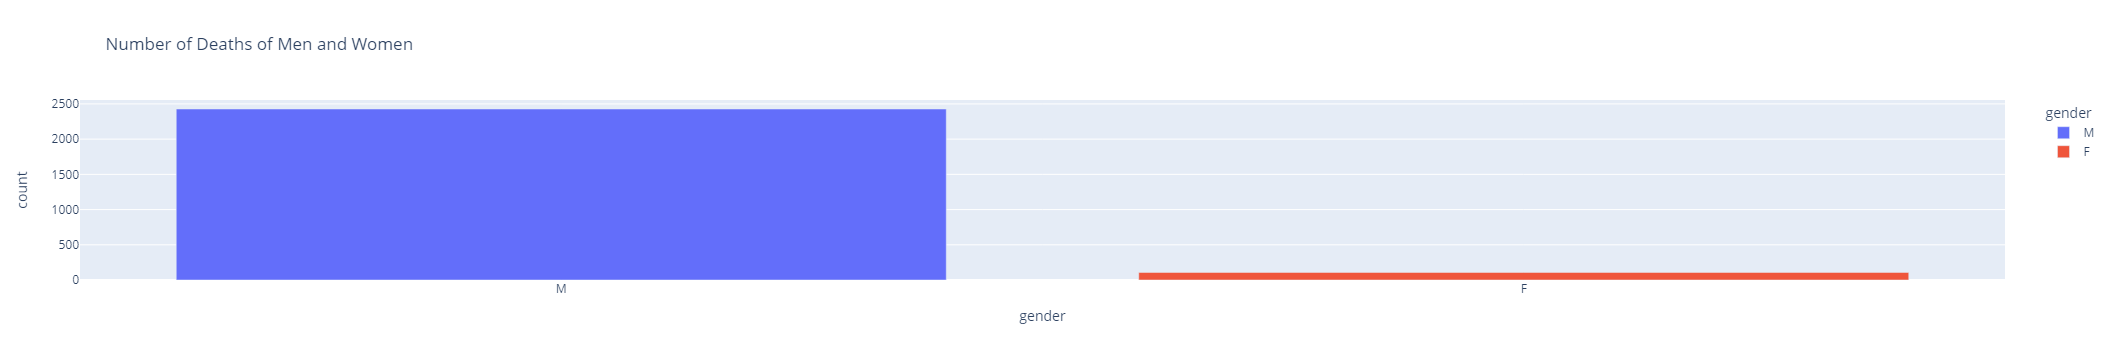

In [88]:
fig = px.bar(df_gender_grouped, 
             x=df_gender_grouped.index, 
             y='count',
             color=df_gender_grouped.index,
             title='Number of Deaths of Men and Women')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [92]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

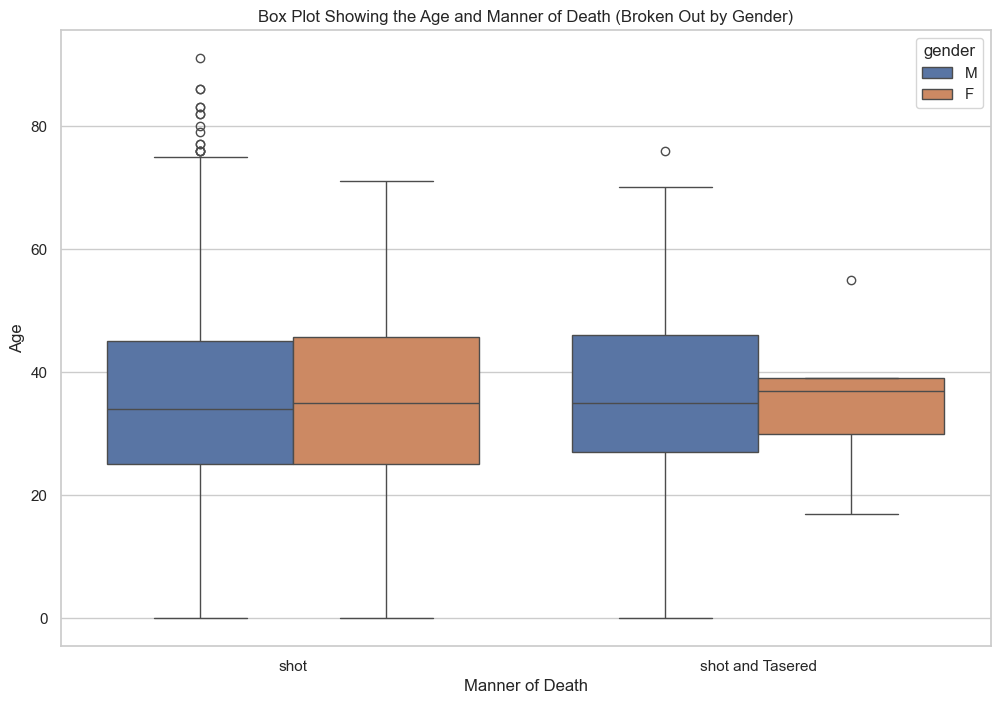

In [93]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities)
plt.title('Box Plot Showing the Age and Manner of Death (Broken Out by Gender)')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()

In [ ]:
sns.boxplot(x='Category', y='Values', data=df)
plt.title('Box Plot Example')
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [97]:
df_armed_grouped = df_fatalities.groupby('armed').size().reset_index(name='count')
df_armed_grouped.head()

,armed,count
0,0,9
1,Taser,9
2,air conditioner,1
3,ax,9
4,baseball bat,8


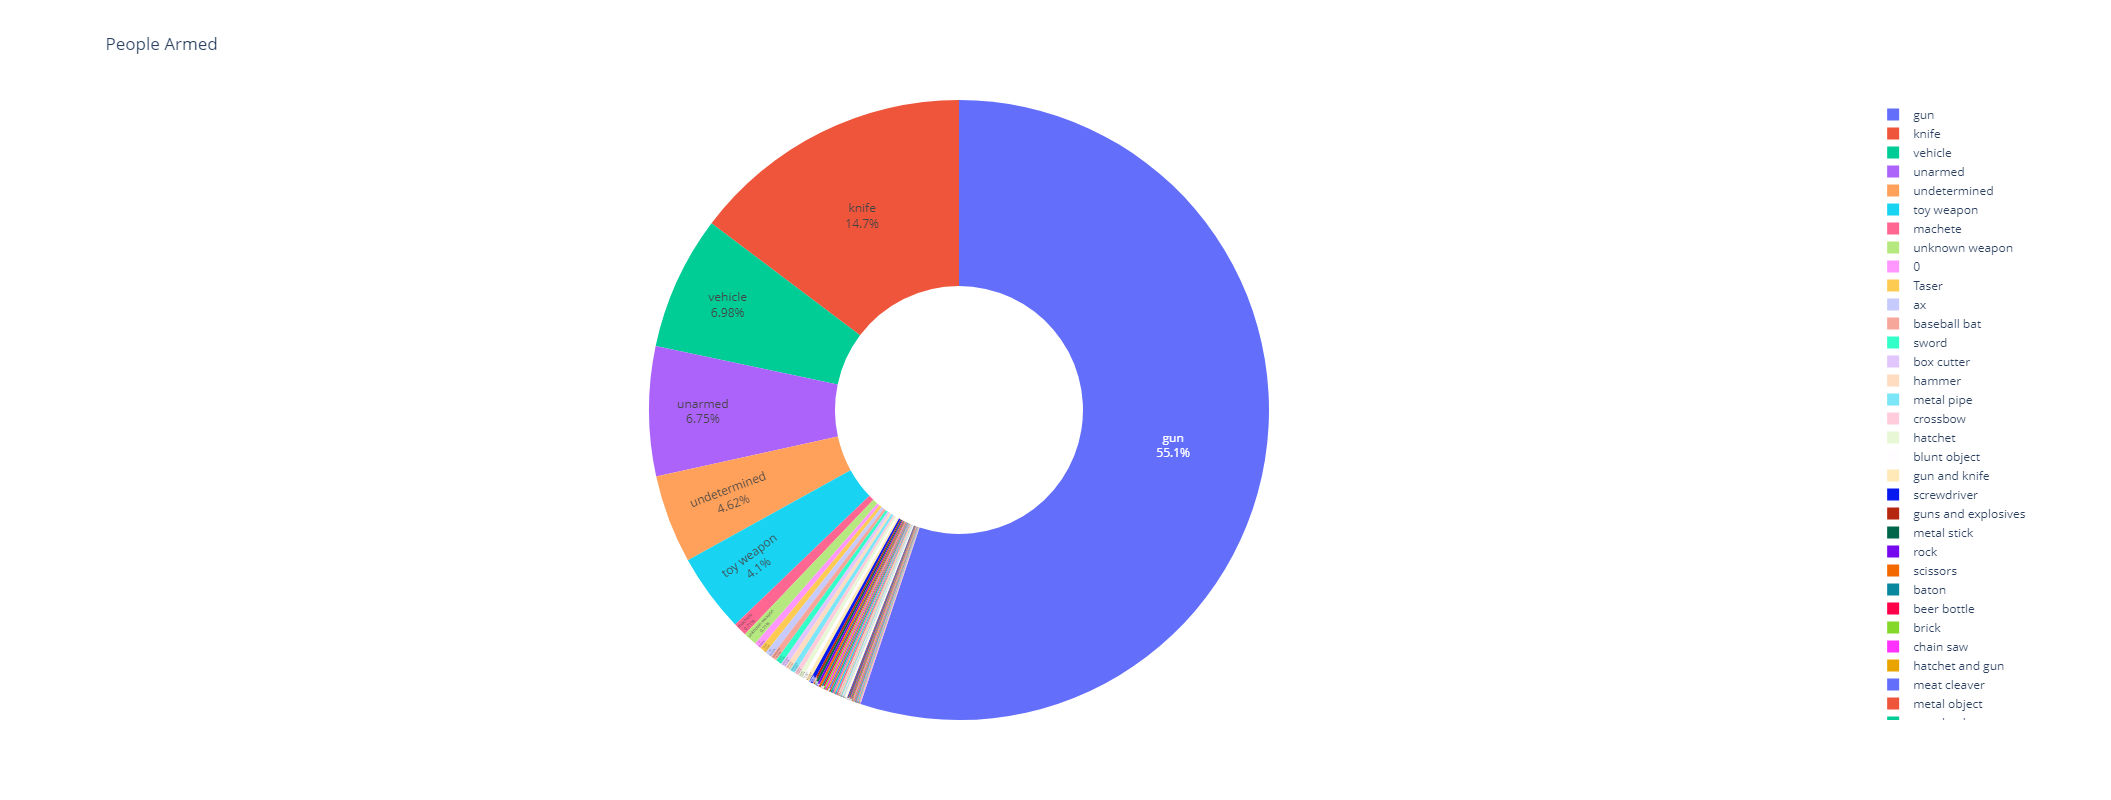

In [103]:
fig = px.pie(df_armed_grouped, 
             names='armed', 
             values='count', 
             title='People Armed',
             hole=0.4,
             labels={'armed': 'armed', 'count': 'percent'},
             template='plotly',
             height=800,
             )
fig.update_traces(textinfo='percent+label', hovertemplate='<b>%{label}</b><br>%{customdata[0]:.2f}%', textposition='inside')
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [104]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')

In [105]:
under_25_percentage = (df_fatalities['age'] < 25).mean() * 100

print(f"Percentage of people killed who were under 25 years old: {under_25_percentage:.2f}%")

Percentage of people killed who were under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

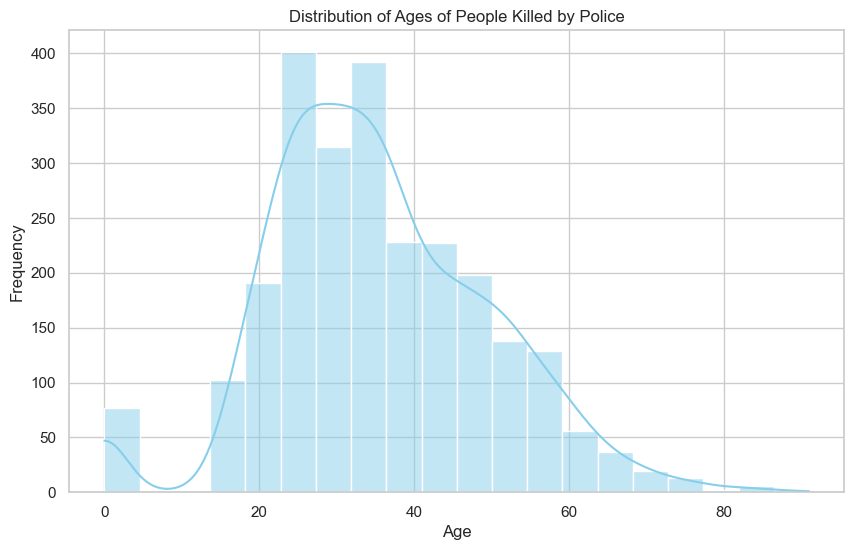

In [106]:
# Create a histogram and KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(df_fatalities['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Figure size 1200x800 with 0 Axes>

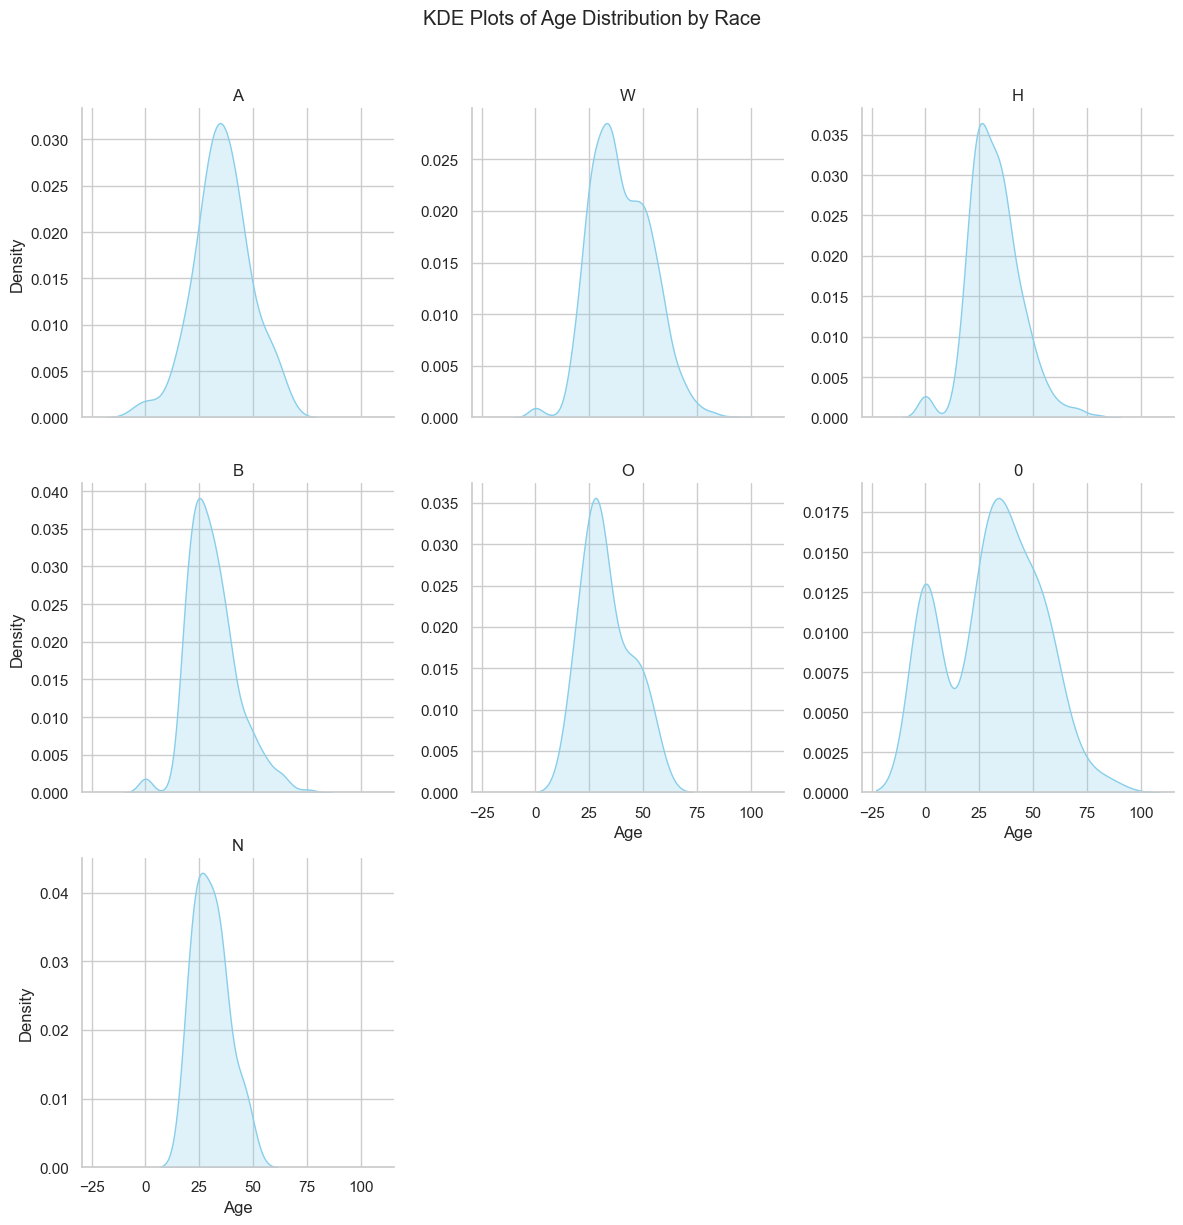

In [107]:
# Create a KDE plot for each race
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=4, sharey=False)
g.map(sns.kdeplot, 'age', color='skyblue', fill=True)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Age", "Density")
plt.suptitle('KDE Plots of Age Distribution by Race', y=1.02)
plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [109]:
df_race_grouped = df_fatalities.value_counts('race')
df_race_grouped.head()

race
W    1201
B     618
H     423
0     195
A      39
Name: count, dtype: int64

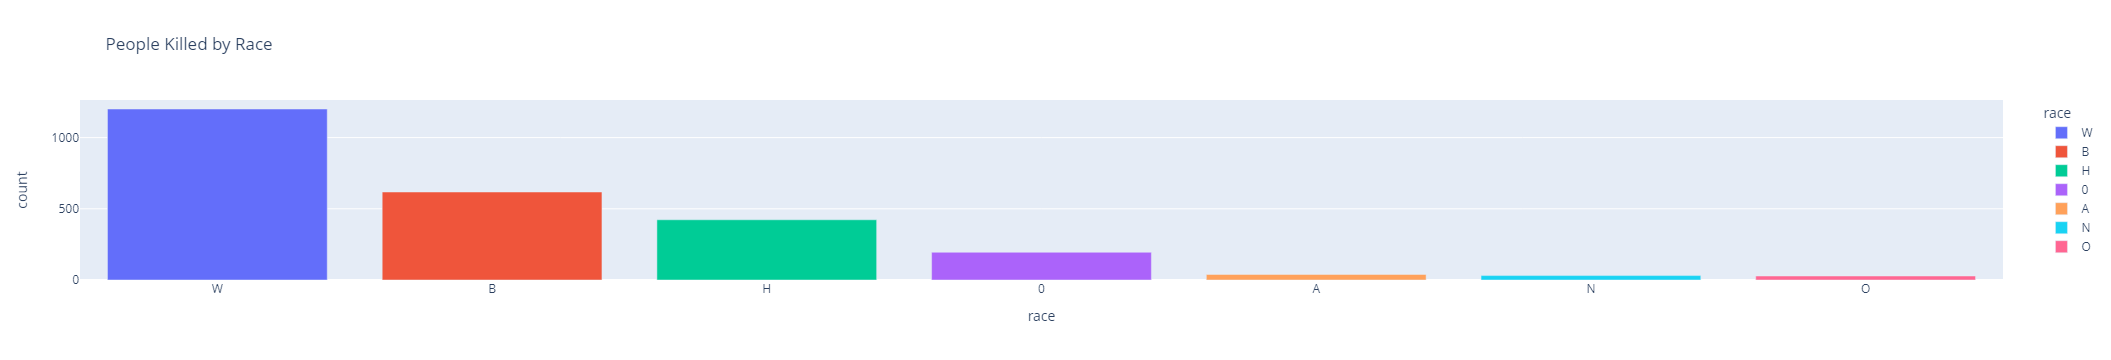

In [113]:
fig = px.bar(df_race_grouped, 
             x=df_race_grouped.index, 
             y='count',
             color=df_race_grouped.index,
             title='People Killed by Race',)
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [117]:
df_mental_grouped = df_fatalities.value_counts('signs_of_mental_illness')
df_mental_grouped.head()

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

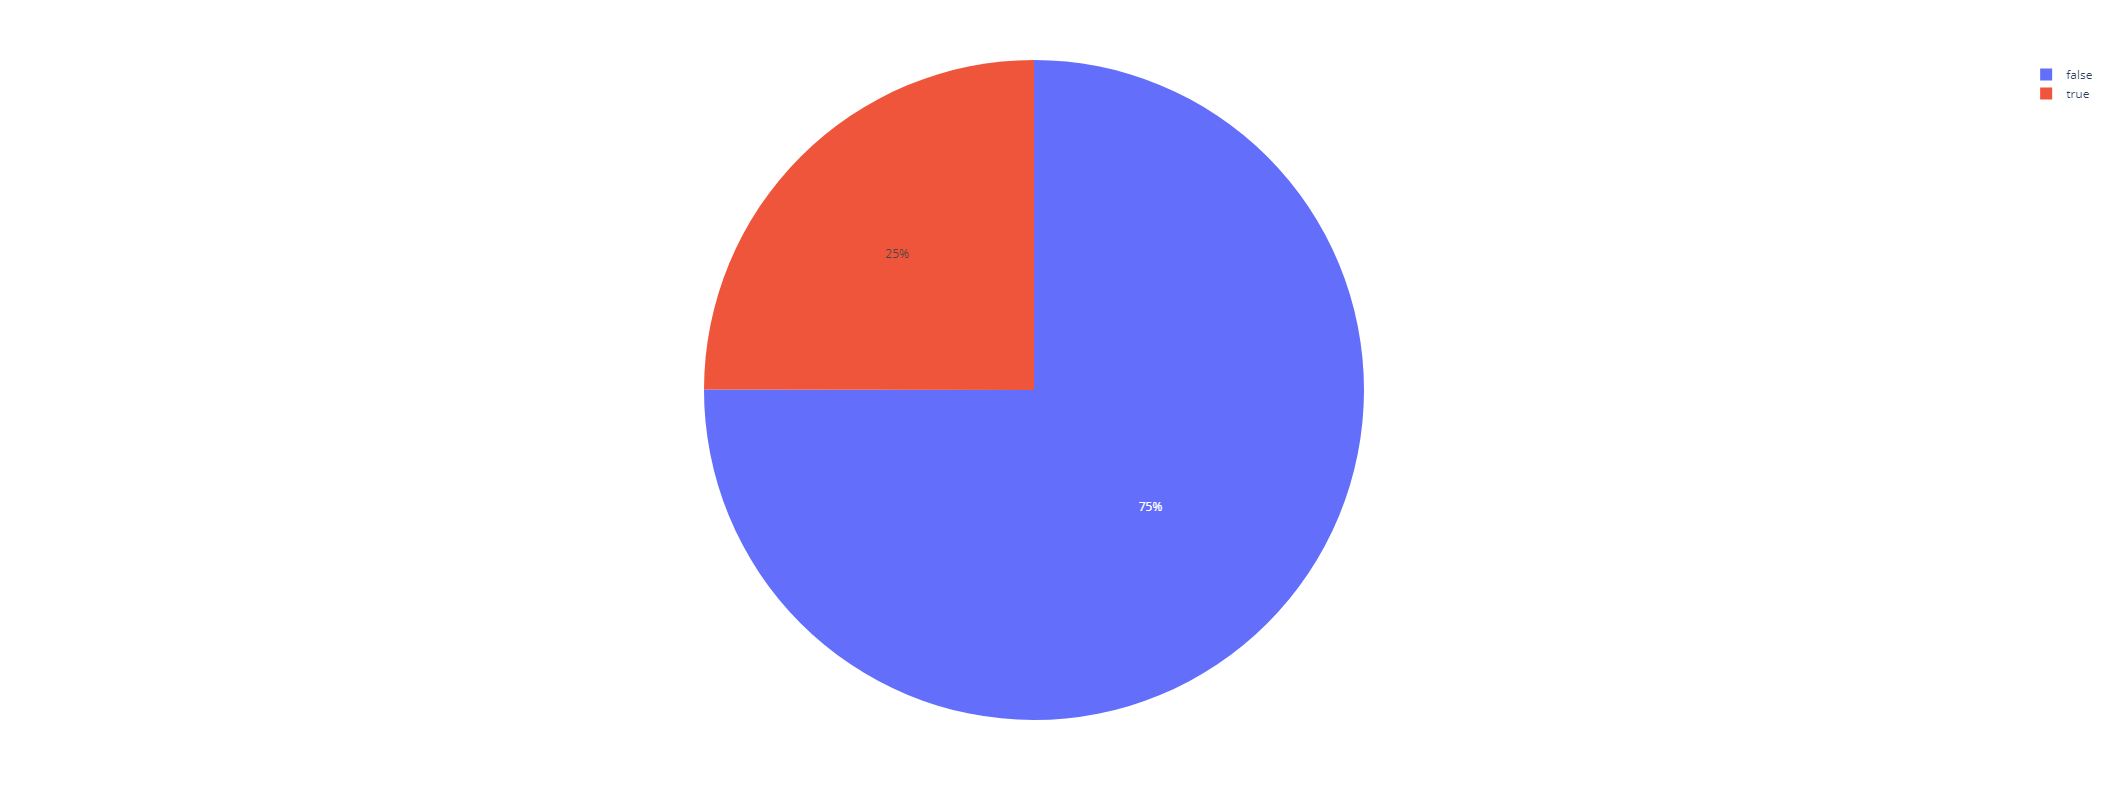

In [119]:
fig = px.pie(df_mental_grouped,
             names=df_mental_grouped.index,
             values='count',
             height=800)
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [120]:
top_cities = df_fatalities['city'].value_counts().nlargest(10)
top_cities.head()

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
Name: count, dtype: int64

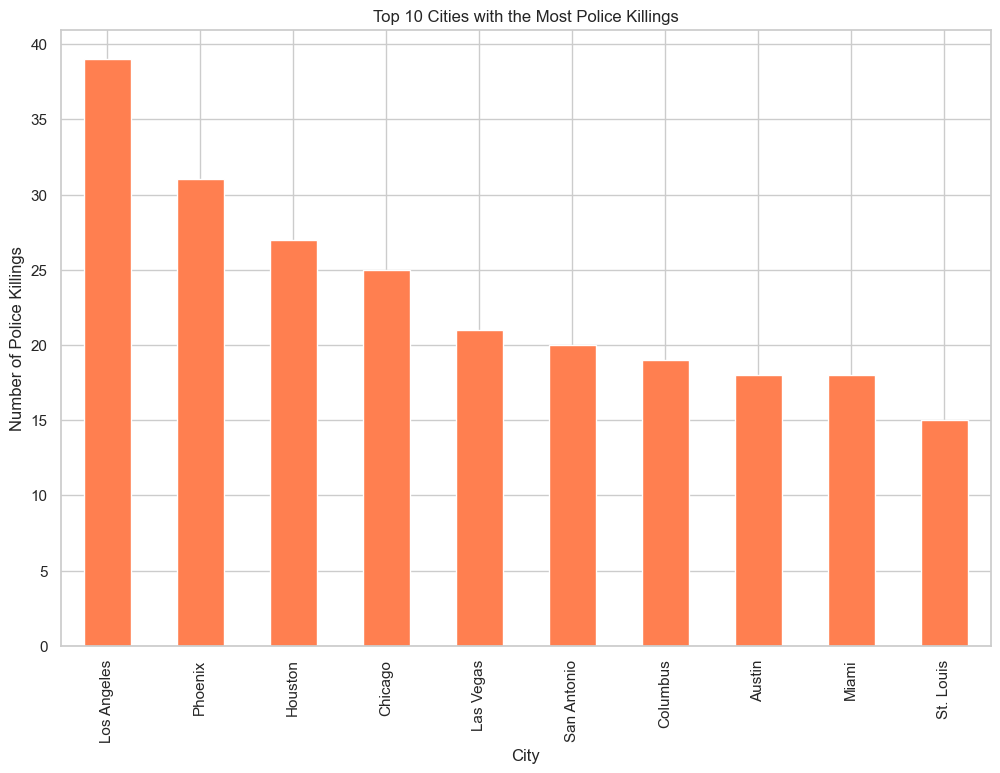

In [123]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar', color='coral')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('City')
plt.ylabel('Number of Police Killings')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [127]:
# Convert the 'date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Calculate the share of each race in the top 10 cities
top_10_cities_race_share = df_fatalities.groupby(['city', 'race']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)
top_10_cities_race_share = top_10_cities_race_share.sort_values(by='city', ascending=False).head(10)

# Display the share of each race in the top 10 cities
print("Share of each race in the top 10 cities:")
print(top_10_cities_race_share)

C:\Users\Okami\AppData\Local\Temp\ipykernel_22136\2396424524.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Share of each race in the top 10 cities:
race           0    A    B    H    N    O    W
city                                          
Zion        0.00 0.00 0.50 0.00 0.00 0.00 0.50
Zanesville  0.00 0.00 0.00 0.00 0.00 0.00 1.00
Yuma        0.00 0.00 0.00 1.00 0.00 0.00 0.00
Yulee       0.00 0.00 0.00 0.00 0.00 0.00 1.00
Yuba City   0.00 1.00 0.00 0.00 0.00 0.00 0.00
Yreka       1.00 0.00 0.00 0.00 0.00 0.00 0.00
York County 0.00 0.00 1.00 0.00 0.00 0.00 0.00
York        0.00 0.00 0.33 0.00 0.00 0.00 0.67
Yorba Linda 0.00 0.00 0.00 0.00 0.00 0.00 1.00
Yonkers     0.00 0.00 1.00 0.00 0.00 0.00 0.00


In [130]:
# Determine the top 10 cities with the most police killings
top_10_killing_cities = df_fatalities['city'].value_counts().head(10)

# Calculate the rate of police killings by race for each city
killing_rate_by_race = df_fatalities.groupby(['city', 'race']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)
killing_rate_by_race = killing_rate_by_race.loc[top_10_killing_cities.index]

In [131]:
print("\nRate of police killings by race for each city:")
print(killing_rate_by_race)


Rate of police killings by race for each city:
race           0    A    B    H    N    O    W
city                                          
Los Angeles 0.08 0.03 0.26 0.49 0.00 0.00 0.15
Phoenix     0.10 0.00 0.06 0.35 0.10 0.00 0.39
Houston     0.04 0.04 0.56 0.22 0.04 0.00 0.11
Chicago     0.04 0.00 0.84 0.04 0.00 0.00 0.08
Las Vegas   0.19 0.00 0.14 0.24 0.00 0.00 0.43
San Antonio 0.10 0.00 0.15 0.60 0.00 0.00 0.15
Columbus    0.05 0.00 0.58 0.00 0.00 0.05 0.32
Austin      0.00 0.00 0.17 0.11 0.00 0.00 0.72
Miami       0.06 0.00 0.44 0.33 0.00 0.00 0.17
St. Louis   0.07 0.00 0.73 0.00 0.00 0.00 0.20


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [145]:
killings_by_state = df_fatalities.groupby('state').size().reset_index(name='killings')
killings_by_state.head()

,state,killings
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


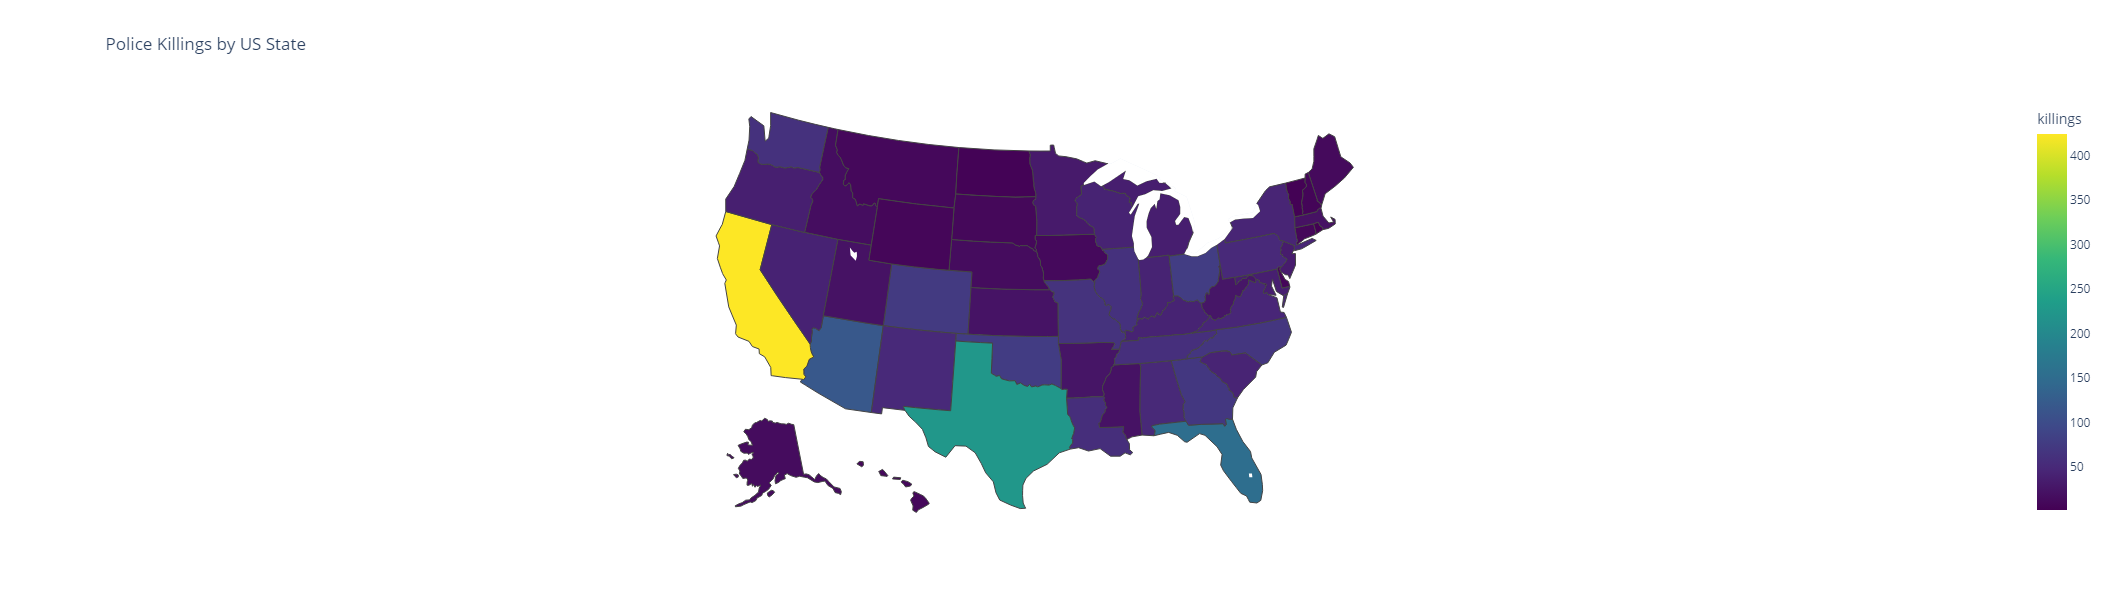

In [162]:
fig = px.choropleth(
    killings_by_state,
    locations='state',
    locationmode='USA-states',
    color='killings',
    scope="usa",
    color_continuous_scale="Viridis",
    title='Police Killings by US State'
)

# Update the layout to make the map bigger
fig.update_layout(
    geo=dict(
        scope='usa',
    ),
    geo_scope='usa',
    geo_bgcolor='rgba(255, 255, 255, 0)',
    height=600,  # Set the height
    width=800,   # Set the width
)

# Show the map
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [164]:
# Assuming df is your DataFrame with 'date' and other relevant columns
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [169]:
# Group by date and count the number of police killings
killings_over_time = df_fatalities.groupby(df_fatalities['date'].dt.year)['id'].count().reset_index(name='killings')
killings_over_time

,date,killings
0,2015,991
1,2016,963
2,2017,581


In [170]:
df_fatalities.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,2017-07-31,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


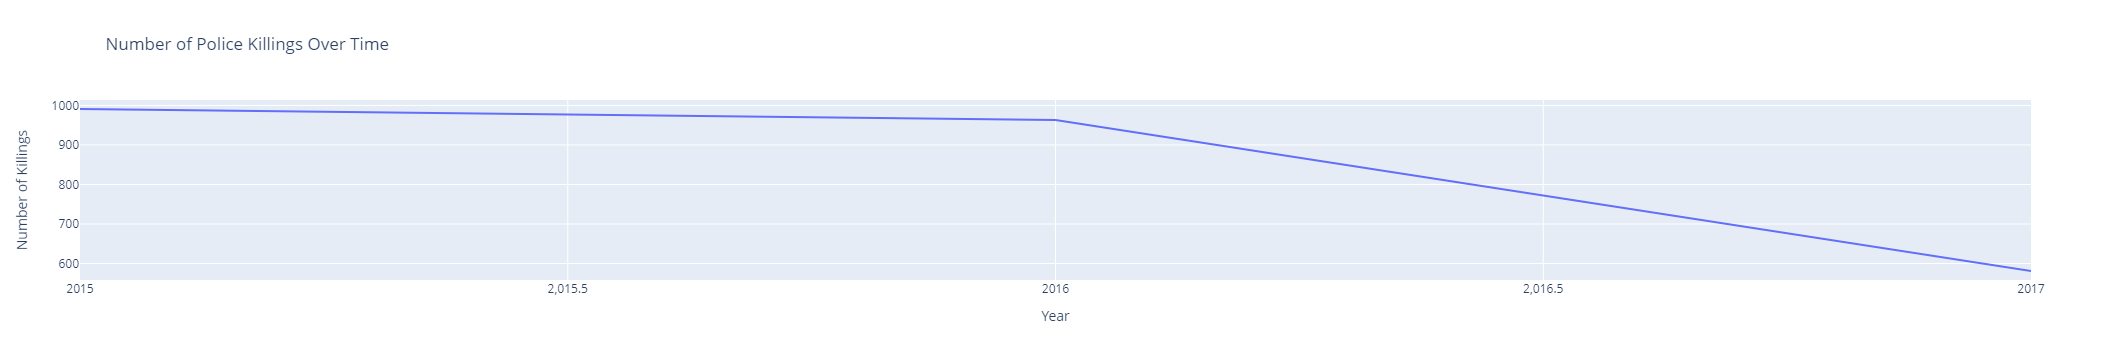

In [168]:
# Create a line plot
fig = px.line(
    killings_over_time,
    x='date',
    y='killings',
    title='Number of Police Killings Over Time',
    labels={'date': 'Year', 'killings': 'Number of Killings'},
    line_shape='linear'  # Set to 'linear' for a line plot
)

# Show the plot
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).